In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid")

In [6]:
data = {
    'soft_living':[1000,1200,1500,1800,2000,2200,2500,3000,3500,4000],
    'price':[15000,18000,20000,23000, 25000,35000,40000,45000,50000,400000]
}

housing = pd.DataFrame(data)
housing.head()

,soft_living,price
0,1000,15000
1,1200,18000
2,1500,20000
3,1800,23000
4,2000,25000


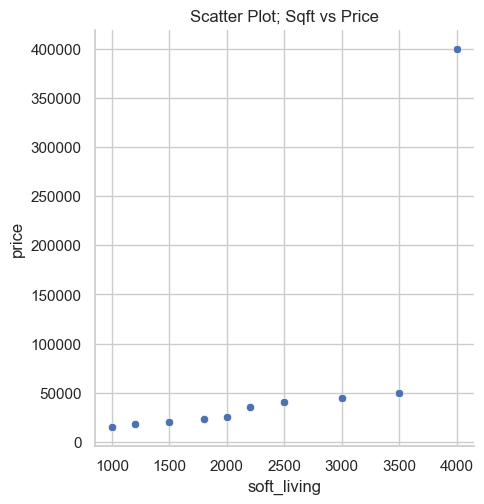

,soft_living,price
soft_living,1.00000,0.69214
price,0.69214,1.00000


In [8]:
sns.relplot(data=housing, x='soft_living', y='price')
plt.title('Scatter Plot; Sqft vs Price')
plt.show()

housing.corr()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    housing[['soft_living']], housing['price'], test_size=0.2, random_state=42
)
x_train.shape, x_test.shape

((8, 1), (2, 1))

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: -180581.00328947377
Coefficient: [113.75822368]


In [11]:
r2_score = model.score(x_test, y_test)
print("R^2 Score:", r2_score)

R^2 Score: -61.37004345407781


In [12]:
y_pred = model.predict(x_test)
predicted = pd.DataFrame(y_pred, columns=['Predicted Price'])
combined = x_test.reset_index(drop=True).join(y_test.reset_index(drop=True)).join(predicted)
combined.head()

,soft_living,price,Predicted Price
0,3500,50000,217572.779605
1,1200,18000,-44071.134868


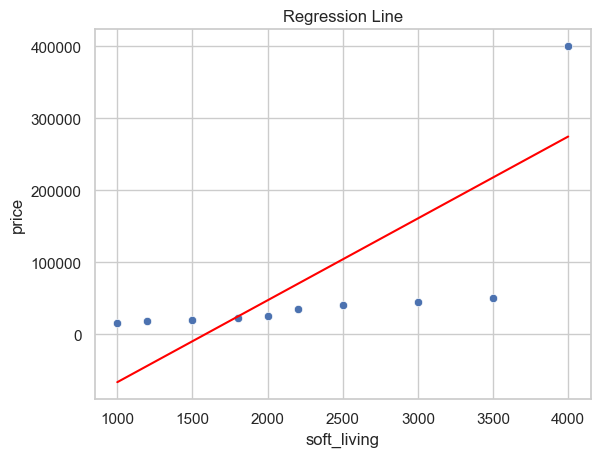

In [13]:
sns.scatterplot(x='soft_living', y='price', data=housing)
plt.plot(housing['soft_living'], model.predict(housing[['soft_living']]), color='red')
plt.title('Regression Line')
plt.show()